In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from sklearn.cluster import KMeans

(1200, 1920, 3)
(100, 160, 3)
(16000, 3)


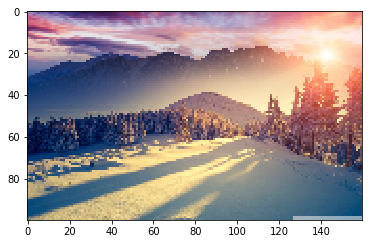

In [2]:
im = cv2.imread('./im.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

print(im.shape)

r, c = im.shape[:2]
out_r = 100
im = cv2.resize(im, (int(out_r*float(c)/r), out_r)) #Keeping the Aspect Ratio of the Image same while resizing
print(im.shape)

pixels = im.reshape((-1, 3))
print(pixels.shape)

plt.imshow(im)
plt.show()

In [3]:
km = KMeans(n_clusters=8)
km.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
centr_colors = np.array(km.cluster_centers_,dtype='uint8')
print(centr_colors.dtype)
print(centr_colors)

print(centr_colors.shape)

uint8
[[197 168 184]
 [110 116 133]
 [168 139 134]
 [246 218 179]
 [142  86  91]
 [ 26  45  89]
 [222 176 136]
 [ 62  83 117]]
(8, 3)


In [5]:
freq = np.array(np.unique(km.labels_, return_counts=True)[1], dtype='float32')
print(freq)
print(freq.sum())
freq = freq/pixels.shape[0]
print(freq)

[1229. 2362. 2569. 2422. 1343. 1795. 2048. 2232.]
16000.0
[0.0768125 0.147625  0.1605625 0.151375  0.0839375 0.1121875 0.128
 0.1395   ]


In [6]:
dom = [[freq[ix], centr_colors[ix]] for ix in range(km.n_clusters)]

DOM = sorted(dom, key=lambda z:z[0], reverse=True)
#DOM = np.array(DOM)
print(DOM[0][1])
#print DOM.shape

[168 139 134]


In [7]:
for ix in DOM:
    print(ix)
    print("----------")

[0.1605625, array([168, 139, 134], dtype=uint8)]
----------
[0.151375, array([246, 218, 179], dtype=uint8)]
----------
[0.147625, array([110, 116, 133], dtype=uint8)]
----------
[0.1395, array([ 62,  83, 117], dtype=uint8)]
----------
[0.128, array([222, 176, 136], dtype=uint8)]
----------
[0.1121875, array([26, 45, 89], dtype=uint8)]
----------
[0.0839375, array([142,  86,  91], dtype=uint8)]
----------
[0.0768125, array([197, 168, 184], dtype=uint8)]
----------


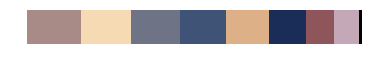

In [11]:
patch = np.ones((50, 500, 3))
start = 0
for ix in range(km.n_clusters):
    width = int(DOM[ix][0]*patch.shape[1])
    end = start+width
    patch[:,start:end,:] = DOM[ix][1]
    start = end
    plt.axis("off")
    plt.imshow(patch/255)
plt.show()